<p align="center">
  <img src="ufQ7zJsB7fRcdMwD3nkz2M.jpg" width=500 height=333 class="center" />
</p>



# Python Data Analysis of Major Spaceflight Milestones
## A Python Project by Ian Takaoka

## Introduction

*Since 1961, **600 humans** have achieved spaceflight from **37 countries**, and this number increases yearly.*
*This project aims to use Python with Wikipedia integration to provide information and useful statistics on some of these astronauts.*

Credits: Mariya Stavnichuk and Tatsuya Corlett (original database), Georgios Karamanis via Kaggle (for csv)

### From the author: 
>*"This database contains publically available information about all astronauts who participated in space missions before 15 January 2020 collected from NASA, Roscosmos, and fun-made websites. The provided information includes full astronaut name, sex, date of birth, nationality, military status, a title and year of a selection program, and information about each mission completed by a particular astronaut such as a year, ascend and descend shuttle names, mission and extravehicular activity (EVAs) durations."*

### Limitations (from me): 
This dataset only has years and not calendar dates, leaving me with limited capability to show change over time. The dataset also does not include spaceflight statistics after January 2020. As the Soviet Union did not distinguish between nationalities within its borders, the USSR/Russia field may include cosmonauts from other Soviet Republics and not specifically from the Russian SFSR. Additionally, no commercial astronauts are listed, as SpaceX's Crew Dragon Demo-2, the first manned commercial spaceflight, did not launch until May 2020. 

## Data Import



In [686]:
import pandas as pd
import numpy as np

##Will return info from Wikipedia about specific individuals. Make sure to pip install wikipedia before proceeding with this program
import wikipedia as wiki

from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('chained_assignment',None)


astronaut_raw = pd.read_csv('astronauts.csv')
astronaut_raw.drop_duplicates(subset=['name' , 'original_name'], keep= 'first')

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,total_number_of_eva,eva_hrs_mission,total_eva_hrs
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.00,0.00
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,...,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.00,0.00
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,...,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.00,0.00
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,...,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.00,0.00
5,6,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-1,...,1962,Vostok 3,Vostok 3,Vostok 3,Vostok 3,94.00,519.33,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,1273,561,345,"McClain, Anne Charlotte","McClain, Anne Charlotte",female,1979,U.S.,military,NASA-21,...,2018,57,Soyuz MS-11,ISS,Soyuz MS-11,4887.00,4887.00,2,13.13,13.13
1273,1274,562,346,"Koch, Christina","Koch, Christina",female,1979,U.S.,civilian,NASA-21,...,2019,59,Soyuz MS-12,ISS,not completed yet,7372.30,7372.30,4,27.80,27.80
1274,1275,563,347,"Morgan, Andrew","Morgan, Andrew",male,1976,U.S.,military,NASA-21,...,2019,60,Soyuz MS-13,ISS,not completed yet,4303.08,4303.08,6,39.52,39.52
1275,1276,564,348,"Meir, Jessica","Meir, Jessica",female,1977,U.S.,civilian,NASA-21,...,2019,60,Soyuz MS-15,ISS,not completed yet,2697.60,2697.60,1,7.28,7.28


## Astronaut Nationality

The Soviet Union was the first nation to achieve manned spaceflight in 1961. Since then, 37 countries have sent humans to space. 

Author's note: In this dataset, some astronauts were of different nationalities or dual nationalities- such as the case with Anglo-American space tourist **Richard Garriott**, and the Ukrainian astronaut **Leonid Kadenyuk**, who was originally a cosmonaut in the Soviet space program before ultimately flying aboard Space Shuttle Columbia as part of NASA. 

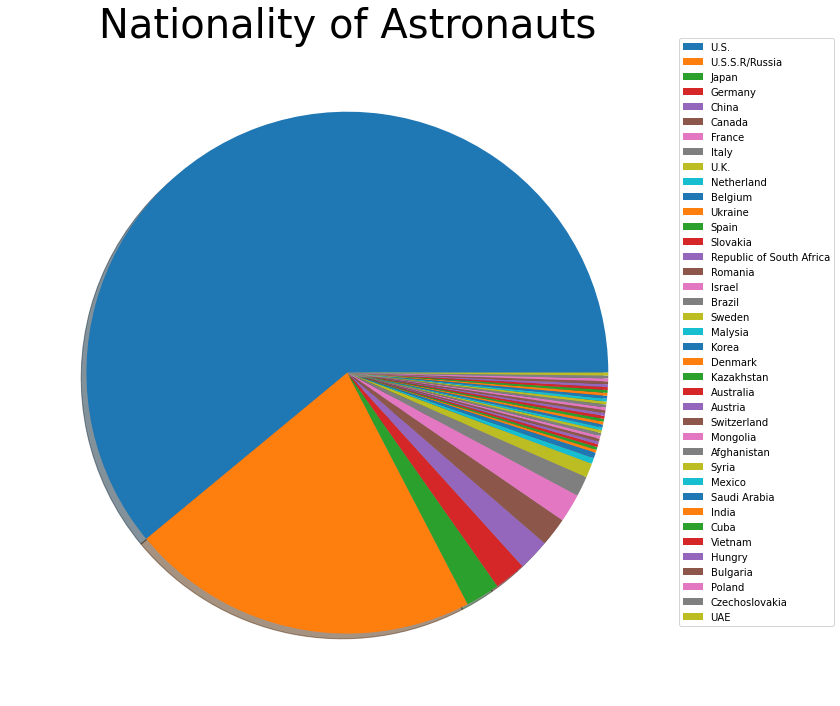

In [687]:
##This dataframe needs to remove duplicates, as many astronauts went to space more than once. 
df1 = astronaut_raw[['name', 'nationality', 'year_of_mission', 'mission_title']]
nations = df1.drop_duplicates(subset ='name', keep = 'first') 
nations_counts=nations['nationality'].value_counts()
ax = nations_counts.plot(kind = "pie", figsize = [24, 12], legend = True, shadow = True, 
title = 'Nationality of Astronauts', fontsize = 40, ylabel=' ', labeldistance = None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.title.set_size(40)
plt.show();



## Astronaut Age
During the Space Race, the first astronauts and cosmonauts were primarily drawn from the military and government sectors. Specifically, due to the highly experimental nature of early manned spaceflight, the first astronauts were almost exclusively test pilots from the armed forces, and as such were well into their military careers. Civilians were eventually drawn into the space program, typically highly degreed scientists as mission specialists. Currently, NASA maintains that Astronaut Candidates (ASCANs) must have at least a Master's degree in a Science, Technology, Engineering, and Mathematics (STEM) field and extensive professional experience, or 1000 hours of pilot command time in jet aircraft. This tends to skew average astronaut ages at selection to early 30s, with crew selections set years in advance of mission launch to allow for adequate training and mission control experience. Thus, many astronauts are in their early 40s at mission launch. 

The youngest astronauts at time of selection were the Soviet cosmonauts **Pyotr Klimuk** , **Gennady Sarafanov** and **Vyacheslav Zudov,** who were each 23 years old. The youngest humans to achieve spaceflight were Soviet cosmonauts **Gherman Titov** and **Valentina Tereshkova**, each at 26 years old. 32 year old **Sally Ride** is the youngest American to achieve spaceflight.

Private citizen **Dennis Tito** at 60 years old currently holds the record for oldest astronaut at selection, while American career astronaut **John Glenn** is the oldest astronaut at time of launch at 77 years old*.

<sub><sup>As of 2022, 90-year old actor William Shatner surpassed John Glenn as the oldest human in space with Blue Origin. As mentioned previously, this is beyond the scope of the dataset</sup></sub>

### Age At Selection

In [688]:
df2 = astronaut_raw[['name', 'year_of_birth', 'year_of_selection', 'nationality', 'selection']]

df2['age_at_selection'] = df2['year_of_selection'] - df2['year_of_birth']

df2.drop_duplicates(subset=['name'], keep= 'first');

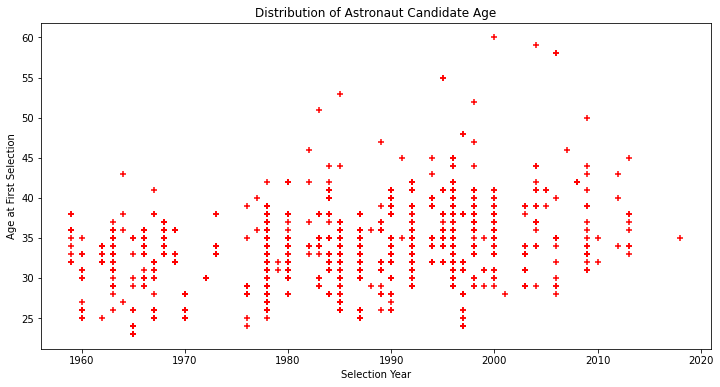

In [689]:
selection_year = df2[['year_of_selection']].to_numpy()
selection_age = df2[['age_at_selection']].to_numpy()
plt.figure(figsize = (12, 6))
plt.scatter(selection_year, selection_age, marker= '+', color = 'red')
plt.xlabel('Selection Year')
plt.ylabel('Age at First Selection')
plt.title('Distribution of Astronaut Candidate Age')
plt.show();

#### Mean Age of Astronauts at Time of Selection

In [690]:
df2_mean = (df2.age_at_selection.mean())
print('The average age of all astronaut candidates prior to 2020 is ' + str(round(df2_mean)) + ' ' + 'years old.' )

The average age of all astronaut candidates prior to 2020 is 34 years old.


#### Youngest Astronauts at Time of Selection

In [691]:
df2_youngest = (df2[df2.age_at_selection == df2.age_at_selection.min()])
df2_youngest.drop_duplicates(subset=['name'], keep= 'first')

,name,year_of_birth,year_of_selection,nationality,selection,age_at_selection
146,"Klimuk, Pyotr",1942,1965,U.S.S.R/Russia,TsPK-3,23
152,"Sarafanov, Gennadi",1942,1965,U.S.S.R/Russia,TsPK-3,23
167,"Zudov, Vyacheslav",1942,1965,U.S.S.R/Russia,TsPK-3,23


#### Oldest Astronauts at Time of Selection

In [692]:
df2_oldest = (df2[df2.age_at_selection == df2.age_at_selection.max()])
df2_oldest.drop_duplicates(subset=['name'], keep= 'first')
wiki.summary(df2_oldest['name'])

,name,year_of_birth,year_of_selection,nationality,selection,age_at_selection
998,"Tito, Dennis Anthony",1940,2000,U.S.,MirCorp,60


'Dennis Anthony Tito (born August 8, 1940) is an American engineer, entrepreneur and astronaut. In mid-2001, he became the first space tourist to fund his own trip into space, when he spent nearly eight days in orbit as a crew member of ISS EP-1, a visiting mission to the International Space Station. This mission was launched by the spacecraft Soyuz TM-32, and was landed by Soyuz TM-31.\n\n'

### Age at Spaceflight

In [693]:
df3 = astronaut_raw[['name', 'year_of_birth', 'year_of_mission', 'nationality', 'mission_title']]

df3['age_at_mission'] = df3['year_of_mission'] - df3['year_of_birth']

df3;

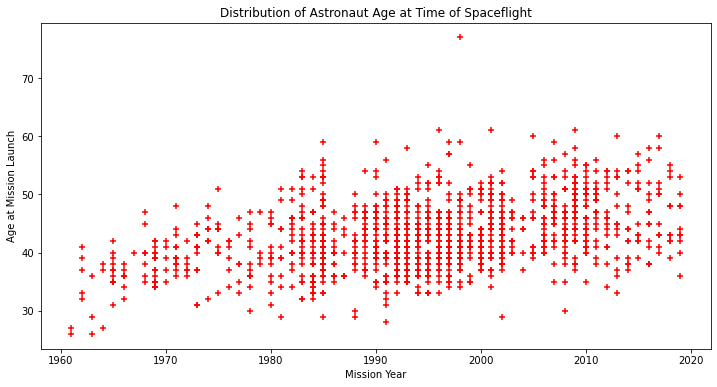

In [694]:
mission_year = df3[['year_of_mission']].to_numpy()
mission_age = df3[['age_at_mission']].to_numpy()
plt.figure(figsize = (12, 6))
plt.scatter(mission_year, mission_age, marker= '+', color = 'red')
plt.xlabel('Mission Year')
plt.ylabel('Age at Mission Launch')
plt.title('Distribution of Astronaut Age at Time of Spaceflight')
plt.show();

#### Mean Age of Astronauts who have Achieved Spaceflight

In [695]:
df3_mean = (df3.age_at_mission.mean())
print('The average age of all astronauts at mission launch prior to 2020 is ' + str(round(df3_mean)) + ' ' + 'years old.' )

The average age of all astronauts at mission launch prior to 2020 is 43 years old.


#### Youngest Astronauts at Mission Launch

In [696]:
df3_youngest = (df3[df3.age_at_mission == df3.age_at_mission.min()])
df3_youngest.drop_duplicates(subset=['name'], keep= 'first')
wiki.summary(df3_youngest['name'], sentences=3)

,name,year_of_birth,year_of_mission,nationality,mission_title,age_at_mission
1,"Titov, Gherman",1935,1961,U.S.S.R/Russia,Vostok 2,26
17,"Tereshkova, Valentina",1937,1963,U.S.S.R/Russia,Vostok 6,26


'Valentina Vladimirovna Tereshkova (Russian: Валентина Владимировна Терешкова, IPA: [vɐlʲɪnʲˈtʲinə vlɐˈdʲimʲɪrəvnə tʲɪrʲɪʂˈkovə] (listen); born 6 March 1937) is an engineer, member of the Russian State Duma, and former Soviet cosmonaut. She is known for being the first and youngest woman in space, having flown a solo mission on the Vostok 6 on 16 June 1963. She orbited the Earth 48 times, spent almost three days in space, and remains the only woman to have been on a solo space mission.'

#### Oldest Astronaut at Mission Launch

In [697]:
df3_oldest = (df3[df3.age_at_mission == df3.age_at_mission.max()])
df3_oldest.drop_duplicates(subset=['name'], keep= 'first')
wiki.summary(df3_oldest['name'], sentences=4)

,name,year_of_birth,year_of_mission,nationality,mission_title,age_at_mission
3,"Glenn, John H., Jr.",1921,1998,U.S.,STS-95,77


'John Herschel Glenn Jr. (July 18, 1921 – December 8, 2016) was an American aviator in the United States Marine Corps, engineer, astronaut, businessman, and politician. He was the third American in space, and the first American to orbit the Earth, circling it three times in 1962. Following his retirement from NASA, he served from 1974 to 1999 as a Democratic United States Senator from Ohio; in 1998, he flew into space again at age 77.'

## Spaceflight Duration Milestones

### Most Missions

In [698]:
df4 = astronaut_raw[['name', 'nationality','total_number_of_missions']].drop_duplicates(subset=['name'], keep= 'first')
df4_mostmissions = df4.nlargest(20, 'total_number_of_missions')
df4_mostmissions


,name,nationality,total_number_of_missions
405,"Ross, Jerry L.",U.S.,7
420,"Chang-Diaz, Franklin R.",U.S.,7
26,"Young, John W.",U.S.,6
225,"Musgrave, Franklin Story",U.S.,6
450,"Krikalev, Sergei",U.S.S.R/Russia,6
492,"Wetherbee, James D.",U.S.,6
618,"Foale, C. Michael",U.S.,6
648,"Brown, Curtis L., Jr.",U.S.,6
740,"Malenchenko, Yuri",U.S.S.R/Russia,6
180,"Dzhanibekov, Vladimir",U.S.S.R/Russia,5


### Cumulative Spaceflight Hours

In [699]:
df5 = astronaut_raw[['name', 'nationality','total_hrs_sum']].drop_duplicates(subset=['name'], keep= 'first')
df5_mosttime = df5.nlargest(20, 'total_hrs_sum')
df5_mosttime
wiki.summary(df5.nlargest(1, 'total_hrs_sum')['name'], sentences=2)

,name,nationality,total_hrs_sum
941,"Padalka, Gennady",U.S.S.R/Russia,21083.52
450,"Krikalev, Sergei",U.S.S.R/Russia,19281.65
608,"Kaleri, Aleksandr",U.S.S.R/Russia,18462.62
635,"Avdeyev, Sergei",U.S.S.R/Russia,17942.23
740,"Malenchenko, Yuri",U.S.S.R/Russia,16872.47
447,"Polyakov, Valeri",U.S.S.R/Russia,16288.53
1041,"Yurchikhin, Fyodor",U.S.S.R/Russia,16147.00
1135,"Kononenko, Oleg D.",U.S.S.R/Russia,16081.00
1031,"Whitson, Peggy A.",U.S.,15982.00
441,"Solovyev, Anatoly",U.S.S.R/Russia,15624.03


'Gennady Ivanovich Padalka (Russian: Гeннадий Иванович Падалка; born 21 June 1958 in Krasnodar, Soviet Union) is a Russian Air Force officer and a Roscosmos cosmonaut. Padalka currently holds the world record for the most time spent in space, at 879 days.'

### Longest Missions

In [700]:
df6 = astronaut_raw[['name', 'nationality', 'year_of_mission', 'mission_title', 'in_orbit', 'hours_mission']].drop_duplicates(subset=['name'], keep= 'first')
df6_longestmissions = df6.nlargest(20, 'hours_mission')
df6_longestmissions
wiki.summary(df6.nlargest(1, 'hours_mission')['name'], sentences=2)

,name,nationality,year_of_mission,mission_title,in_orbit,hours_mission
1261,"Ryzhikov, Sergey",U.S.S.R/Russia,2016,49,ISS,10383.25
438,"Manarov, Musa",U.S.S.R/Russia,1987,3,Mir,8782.00
1273,"Koch, Christina",U.S.,2019,59,ISS,7372.30
1258,"Onishi, Takuya",Japan,2016,48,ISS,6902.35
1259,"Rubins, Kathleen",U.S.,2016,48,ISS,6902.35
447,"Polyakov, Valeri",U.S.S.R/Russia,1988,3,Mir,5782.00
282,"Solovyov, Vladimir",U.S.S.R/Russia,1984,Salyut 7,Salyut 7,5686.00
284,"Atkov, Oleg",U.S.S.R/Russia,1984,Salyut 7,Salyut 7,5686.00
79,"Berezovoy, Anatoly",U.S.S.R/Russia,1982,Salyut 7,Salyut 7,5073.00
1271,"Saint-Jaques, David",Canada,2018,57,ISS,4887.00


'Sergey Nikolayevich Ryzhikov (Russian: Сергей Николаевич Рыжиков; born on 19 August 1974), lieutenant colonel of Russian Air Force, is a Russian cosmonaut, selected in 2006. \nHe is a veteran of two long duration space flights to the ISS.\n\n\n== Early life and education ==\nRyzhikov was born on 19 August 1974 in Bugulma, Tatar Autonomous Soviet Socialist Republic.'

### Longest Missions (SPACE STATIONS EXCLUDED)

In [701]:
df6_nospacestations = df6[df6['in_orbit'].str.contains("ISS|Mir|Salyut|Skylab")==False]
df6_longestmissions_nospacestations = df6_nospacestations.nlargest(20, 'hours_mission')
df6_longestmissions_nospacestations
wiki.summary(df6_nospacestations.nlargest(1, 'hours_mission')['name'], sentences=2)

,name,nationality,year_of_mission,mission_title,in_orbit,hours_mission
201,Arnaldo Tamayo Mendez,Cuba,1980,Soyuz 38,Soyuz 38,1887.71
1260,"Chen, Dong",China,2016,Shenzhou 11,Shenzhou 11,774.50
134,"Kerwin, Joseph P.",U.S.,1973,Skylab 2,Apollo Sk.2,672.00
922,"Eyharts, Léopold",France,1998,Soyuz TM-27/26,Soyuz TM-27,496.50
704,"Haigneré, Jean-Pierre",France,1993,Soyuz TM-17 / Soyuz TM-16,Soyuz TM-17,496.00
878,"Ewald, Reinhold",Germany,1997,Soyuz TM-25/24,Soyuz TM-25,472.57
114,"Sevastyanov, Vitali",U.S.S.R/Russia,1970,Soyuz 9,Soyuz 9,424.00
870,"Favier, Jean-Jacques",France,1996,STS-78,STS-78,405.80
871,Robert Thirsk,Canada,1996,STS-78,STS-78,405.80
865,"Linnehan, Richard M.",U.S.,1996,STS-78,STS-78,405.00


'Arnaldo Tamayo Méndez (born January 29, 1942) is a Cuban military officer, legislator, and former cosmonaut and the first person of African heritage in space. In 1980, as a member of the crew of Soyuz 38, he became the first Cuban citizen, the first Latin American, the first person of African descent, and the first person from a country in the Western Hemisphere other than the United States to travel into Earth orbit.'

### Extravehicular Activity
Extravehicular activity (often called spacewalk) refers to the time spent by an astronaut outside of their spacecraft while in spaceflight. The first EVA was performed by Soviet cosmonaut Alexei Leonov in 1965, and Neil Armstrong became the first person to leave his vehicle on another planetary body in 1969. While safeguards are in place and all astronauts undergo training to perform zero-gravity maneuvers in pressure suits, EVA carries extremely high risk to the astronaut, and as such not all astronauts are relied upon to perform tasks outside their spacecraft. 

In [702]:
df7 = astronaut_raw[['name', 'nationality', 'in_orbit', 'eva_hrs_mission', 
'total_eva_hrs']].drop_duplicates(subset=['name'], keep= 'first')
df7

,name,nationality,in_orbit,eva_hrs_mission,total_eva_hrs
0,"Gagarin, Yuri",U.S.S.R/Russia,Vostok 2,0.00,0.00
1,"Titov, Gherman",U.S.S.R/Russia,Vostok 2,0.00,0.00
2,"Glenn, John H., Jr.",U.S.,MA-6,0.00,0.00
4,"Carpenter, M. Scott",U.S.,Mercury-Atlas 7,0.00,0.00
5,"Nikolayev, Andriyan",U.S.S.R/Russia,Vostok 3,0.00,0.00
...,...,...,...,...,...
1272,"McClain, Anne Charlotte",U.S.,ISS,13.13,13.13
1273,"Koch, Christina",U.S.,ISS,27.80,27.80
1274,"Morgan, Andrew",U.S.,ISS,39.52,39.52
1275,"Meir, Jessica",U.S.,ISS,7.28,7.28


### Most EVA during Mission

In [703]:
df7_eva_longest = df7.nlargest(10, 'eva_hrs_mission')
df7_eva_longest

,name,nationality,in_orbit,eva_hrs_mission,total_eva_hrs
1274,"Morgan, Andrew",U.S.,ISS,39.52,39.52
1020,"Walheim, Rex J.",U.S.,STS-110,34.60,56.73
569,"Artsebarsky, Anatoly",U.S.S.R/Russia,Mir,32.28,32.28
852,"Onufrienko, Yuri",U.S.S.R/Russia,Mir,30.50,42.53
1090,"Williams, Sunita L.",U.S.,ISS,28.28,50.67
1273,"Koch, Christina",U.S.,ISS,27.80,27.80
1264,"Vande Hei, Mark",U.S.,ISS,27.00,27.00
890,"Vinogradov, Pavel",U.S.S.R/Russia,Mir,25.27,38.40
282,"Solovyov, Vladimir",U.S.S.R/Russia,Salyut 7,22.83,31.67
131,"Schmitt, Harrison H.",U.S.,Apollo 17,22.07,22.07


### Most EVA Hours

In [704]:
df7_eva_most = df7.nlargest(10, 'total_eva_hrs')
df7_eva_most
wiki.summary(df7.nlargest(1, 'total_eva_hrs')['name'], sentences=3)

,name,nationality,in_orbit,eva_hrs_mission,total_eva_hrs
441,"Solovyev, Anatoly",U.S.S.R/Russia,Mir EP,0.00,78.80
830,"Lopez-Alegria, Michael E.",U.S.,STS-73,0.00,67.67
1176,"Feustel, Andrew J.",U.S.,STS-125,21.00,61.80
1031,"Whitson, Peggy A.",U.S.,ISS,4.38,60.31
793,"Grunsfeld, John M.",U.S.,STS-67,0.00,59.50
1041,"Yurchikhin, Fyodor",U.S.S.R/Russia,STS­112,0.00,59.43
405,"Ross, Jerry L.",U.S.,STS-61,12.20,58.53
1020,"Walheim, Rex J.",U.S.,STS-110,34.60,56.73
975,"Mastracchio, Richard A.",U.S.,STS-106,0.00,53.07
1090,"Williams, Sunita L.",U.S.,ISS,28.28,50.67


'Anatoly Yakovlevich Solovyev (Russian: Анатолий Яковлевич Соловьёв; alternate spelling "Solovyov") is a retired Russian and Soviet cosmonaut and pilot. Solovyev was born on January 16, 1948, in Riga, Latvia (at that time - republic of the Soviet Union). Solovyev holds the world record on the number of spacewalks performed (16), and accumulated time spent spacewalking (over 82 hours).'